# Financial News Sentiment Analysis Project

## Overview
This project analyzes financial news data to uncover correlations between news sentiment and stock market movements for Nova Financial Solutions.

## Objectives
1. **Sentiment Analysis**: Analyze sentiment in financial news headlines using NLP techniques
2. **Correlation Analysis**: Study statistical relationships between news sentiment and stock price movements




In [1]:
# Import necessary libraries and modules
import os
import sys

sys.path.insert(0, os.path.dirname(os.getcwd()))
from scripts.financial_analysis import FinancialAnalysis

# Suppress FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Loading and Initial Analysis
 
First, we'll load the financial news dataset and perform some initial exploratory analysis to understand the data structure and content.



In [2]:
# Initialize the FinancialAnalysis class
analysis = FinancialAnalysis()

# Load the dataset
analysis.load_data()

# Display the first few rows of the dataset
analysis.df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


 #### Initial Data Exploration
 
 Let's explore the key characteristics of our dataset:
 
 1. **Dataset Size**: Examining record count and column structure
 2. **Data Quality**: Checking for missing values and duplicates
 3. **Statistical Overview**: Basic statistics for numerical fields
 4. **Categorical Analysis**: Distribution of text-based columns


In [3]:
analysis.explore_data()


Dataset Overview:
------------------------------
Number of records: 1407328
Columns: Unnamed: 0, headline, url, publisher, date, stock

Missing Values:
------------------------------
Empty DataFrame
Columns: [Missing Count, Missing %]
Index: []

Duplicates:
------------------------------
Duplicate rows: 0 (0.0%)

Duplicates (excluding Unnamed: 0): 1 (0.0%)

Numerical Statistics:
------------------------------
         Unnamed: 0
count  1.407328e+06
mean   7.072454e+05
std    4.081009e+05
min    0.000000e+00
25%    3.538128e+05
50%    7.072395e+05
75%    1.060710e+06
max    1.413848e+06

Categorical Columns:
------------------------------

headline:
Unique values: 845770
Top 3 most common:
headline
Benzinga's Top Upgrades       5449
Benzinga's Top Downgrades     5372
Benzinga's Top Initiations    4241
Name: count, dtype: int64

url:
Unique values: 883429
Top 3 most common:
url
https://www.benzinga.com/news/20/03/15538835/stocks-that-hit-52-week-lows-on-thursday    1704
https://www.benz

#### Data Cleaning and Preprocessing
 Let's clean and standardize our dataset for analysis


In [4]:
analysis.clean_data()
analysis.exploratory_analysis()


=== Exploratory Analysis ===

Dataset Shape: (55982, 10)
Date Range: 2011-04-27 21:01:48-04:00 to 2020-06-11 17:12:35-04:00

Top 10 Most Covered Stocks:
stock
GRUB    10
TSLA    10
FIVE    10
DEJ     10
CRIS    10
GDL     10
HTZ     10
UAL     10
GLTR    10
CHS     10
Name: count, dtype: int64

Articles by Hour of Day:
hour
0       67
1       14
2       57
3       93
4     1469
5     1829
6     2475
7     5032
8     5526
9     5965
10    7668
11    5701
12    5732
13    2710
14    2075
15    1612
16    3939
17    2799
18     704
19     227
20     131
21      82
22      48
23      27
Name: count, dtype: int64

Headline Length Summary:
count    55982.000000
mean        80.013951
std         56.127638
min         12.000000
25%         42.000000
50%         63.000000
75%         91.000000
max        512.000000
Name: headline_length, dtype: float64

Number of Unique Publishers: 225

Top 5 Publishers by Article Count:
publisher
Benzinga Newsdesk    14745
Lisa Levin           12408
Etf Profe

 #### 📊 Initial Data Analysis Summary:
 
 1. 📈 Dataset Scale:
    - Large dataset with 1.4M records
    - Clean data with no missing values
    - Minimal duplicates (<0.1%)

 2. 📰 Content Analysis:
    - 845K unique headlines
    - Most common headlines are analyst ratings (upgrades/downgrades)
    - 883K unique URLs with some repeated content


# Descriptive Statistics Analysis

### Key Metrics:
1. **Headline Statistics**: Distribution of headline character lengths
2. **Publisher Analysis**: Top publishers by article volume
3. **Temporal Patterns**: 
   - Daily article distribution across weekdays
   - Monthly publication trends over time


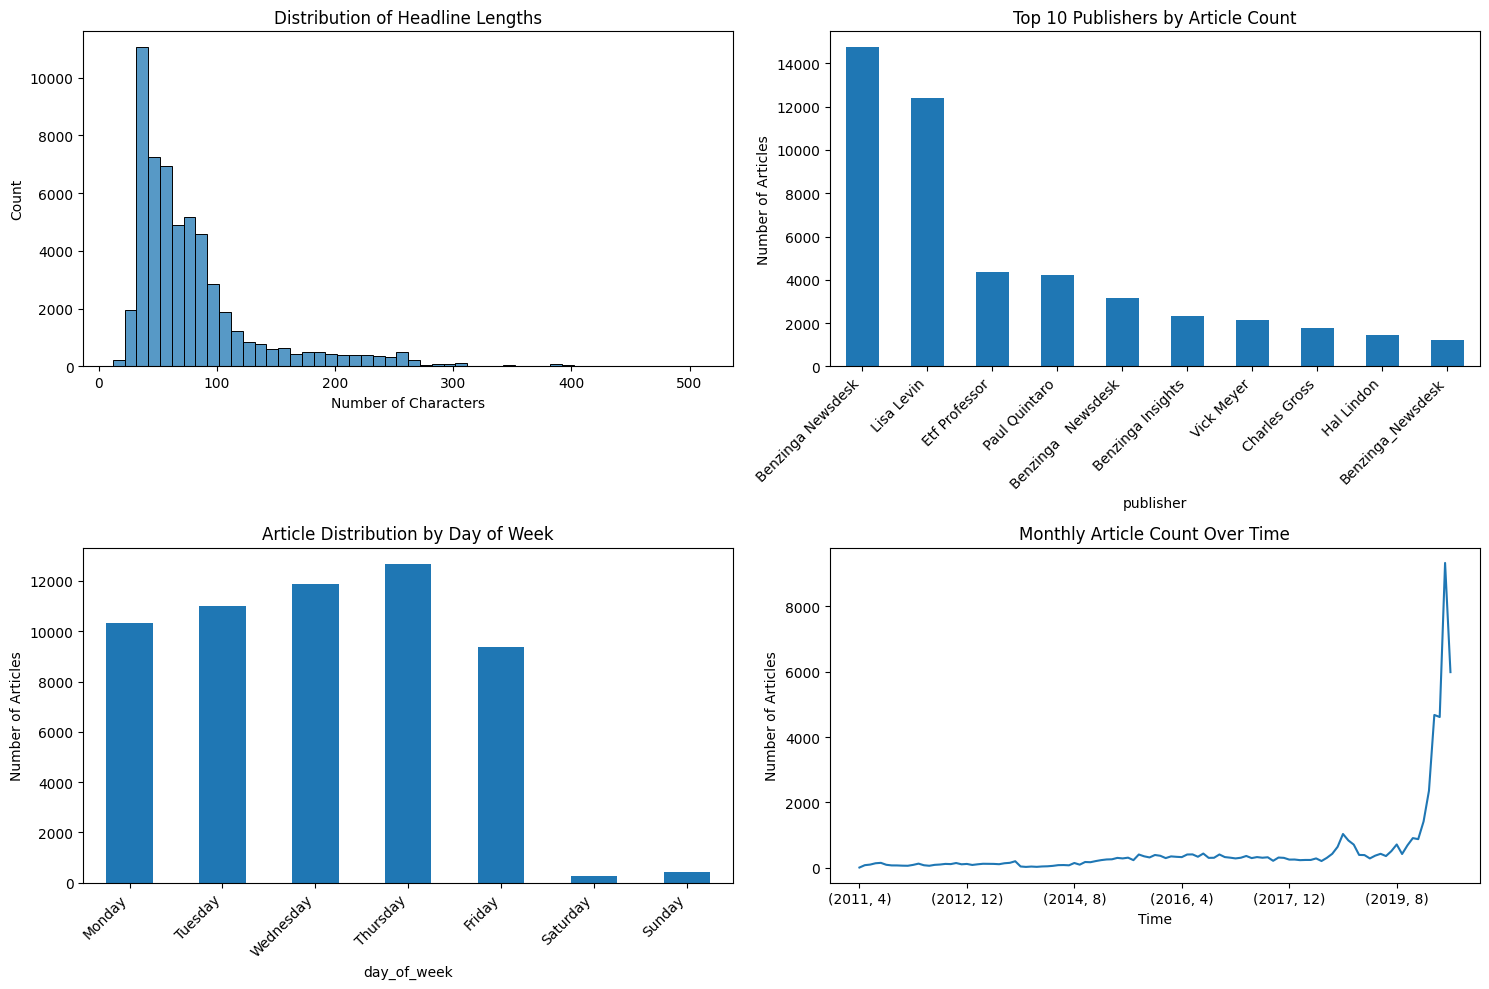


Headline Length Statistics:
Average length: 80.0 characters
Median length: 63.0 characters
Most common length: 40 characters

Publication Patterns:
Most active day: Thursday (12687 articles)
Least active day: Saturday (267 articles)

Publisher Diversity:
Total number of unique publishers: 225
Top publisher: Benzinga Newsdesk (14745 articles)


In [5]:
analysis.descriptive_statistics()

 ### 📊 Key Insights from Descriptive Statistics Analysis:
  1. 📏 Headline Length Analysis:
     - Distribution shows most headlines between 50-100 characters
     - Strong positive skew with long right tail
     - Peak frequency around 50-60 characters
     - Some outliers extend beyond 200 characters
  2. ⏰ Publisher Analysis:
     - Top 10 publishers dominate article volume
     - Steep decline in article counts after top publishers
     - Long tail of publishers with fewer articles
  3. 📅 Day of Week Distribution:
     - Clear weekday vs weekend pattern
     - Highest activity mid-week (Tue-Thu)
     - Very low weekend activity
     - Pattern reflects market trading days
  4. 📈 Monthly Article Trends:
     - Dramatic increase in recent periods
     - Earlier periods show steady baseline
     - Exponential growth pattern visible
     - Some month-to-month volatility





## 📊 Sentiment Analysis
 - Classify headlines: positive/negative/neutral
 - Measure market sentiment trends



=== Sentiment Analysis ===

Performing Sentiment Analysis...

Sentiment Distribution:
Neutral: 77.2%
Positive: 16.8%
Negative: 5.8%


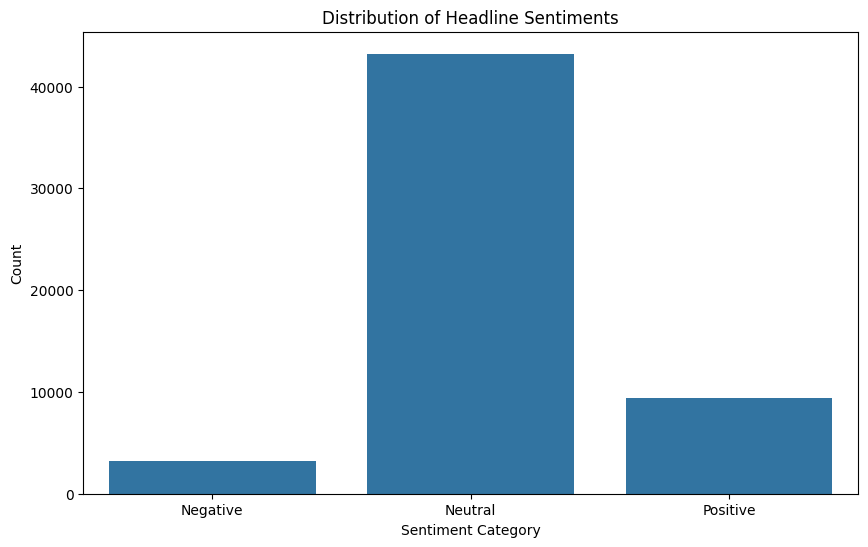

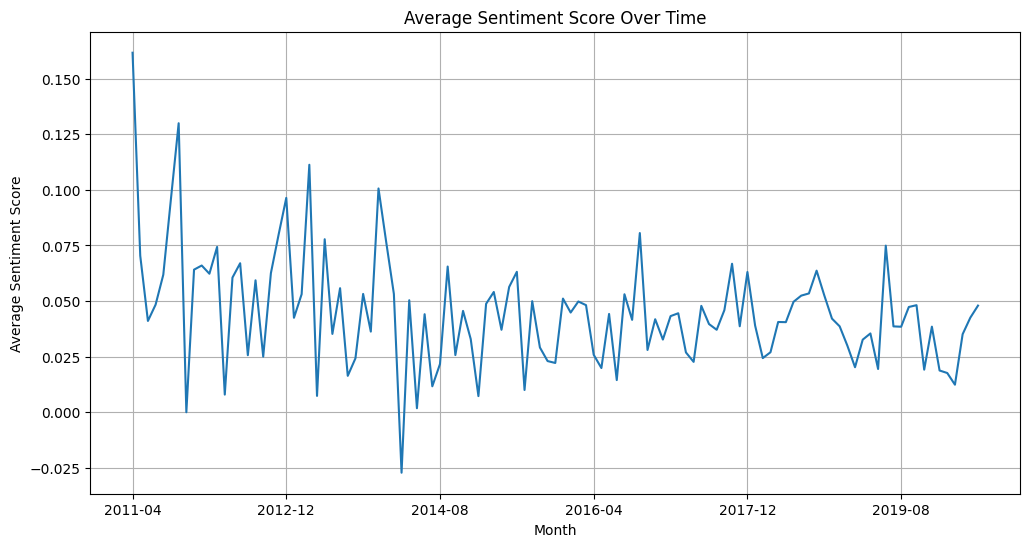

In [6]:
# Perform sentiment analysis
print("=== Sentiment Analysis ===")
analysis.analyze_sentiment()

### 📊 Key Insights from Sentiment Analysis:
1. 📈 Distribution Pattern:
    - Majority of headlines are neutral (~70-80%)
    - Positive headlines (~15-20%) outnumber negative ones (~5-10%) 
    - Very few strongly positive/negative headlines
2. 🔄 Temporal Trends:
    - Sentiment shows cyclical patterns over time
    - Market events influence sentiment swings
    - Overall sentiment remains slightly positive, averaging around 0.05
    - Notable volatility in early 2012 with peaks around 0.125
3. 💡 Implications:
    - Financial news tends toward neutral, factual reporting
    - Positive bias exists but is moderate
    - Extreme sentiment is rare, reflecting journalistic restraint
4. 📝 Methodology Note:
    - TextBlob sentiment analysis used
    - -1 to +1 scale for scoring
    - Three categories: Negative (<-0.1), Neutral (-0.1 to 0.1), Positive (>0.1)


## 🔍 Topic & Phrase Analysis  
 - Extract key topics using NLP
 - Track important events (FDA approvals, mergers, etc.)
 - Monitor financial terms frequency


=== Topic Modeling ===

Performing Topic Modeling...
[[0.04000003 0.04000003 0.04053292 0.83946701 0.04000001]
 [0.04000002 0.24000391 0.04000002 0.63999601 0.04000003]
 [0.8666664  0.03333337 0.03333336 0.03333335 0.03333351]
 ...
 [0.05000013 0.30002464 0.05000016 0.05000009 0.54997498]
 [0.05000004 0.54999719 0.3000027  0.05000002 0.05000004]
 [0.05000003 0.79999989 0.05000003 0.05000002 0.05000002]]


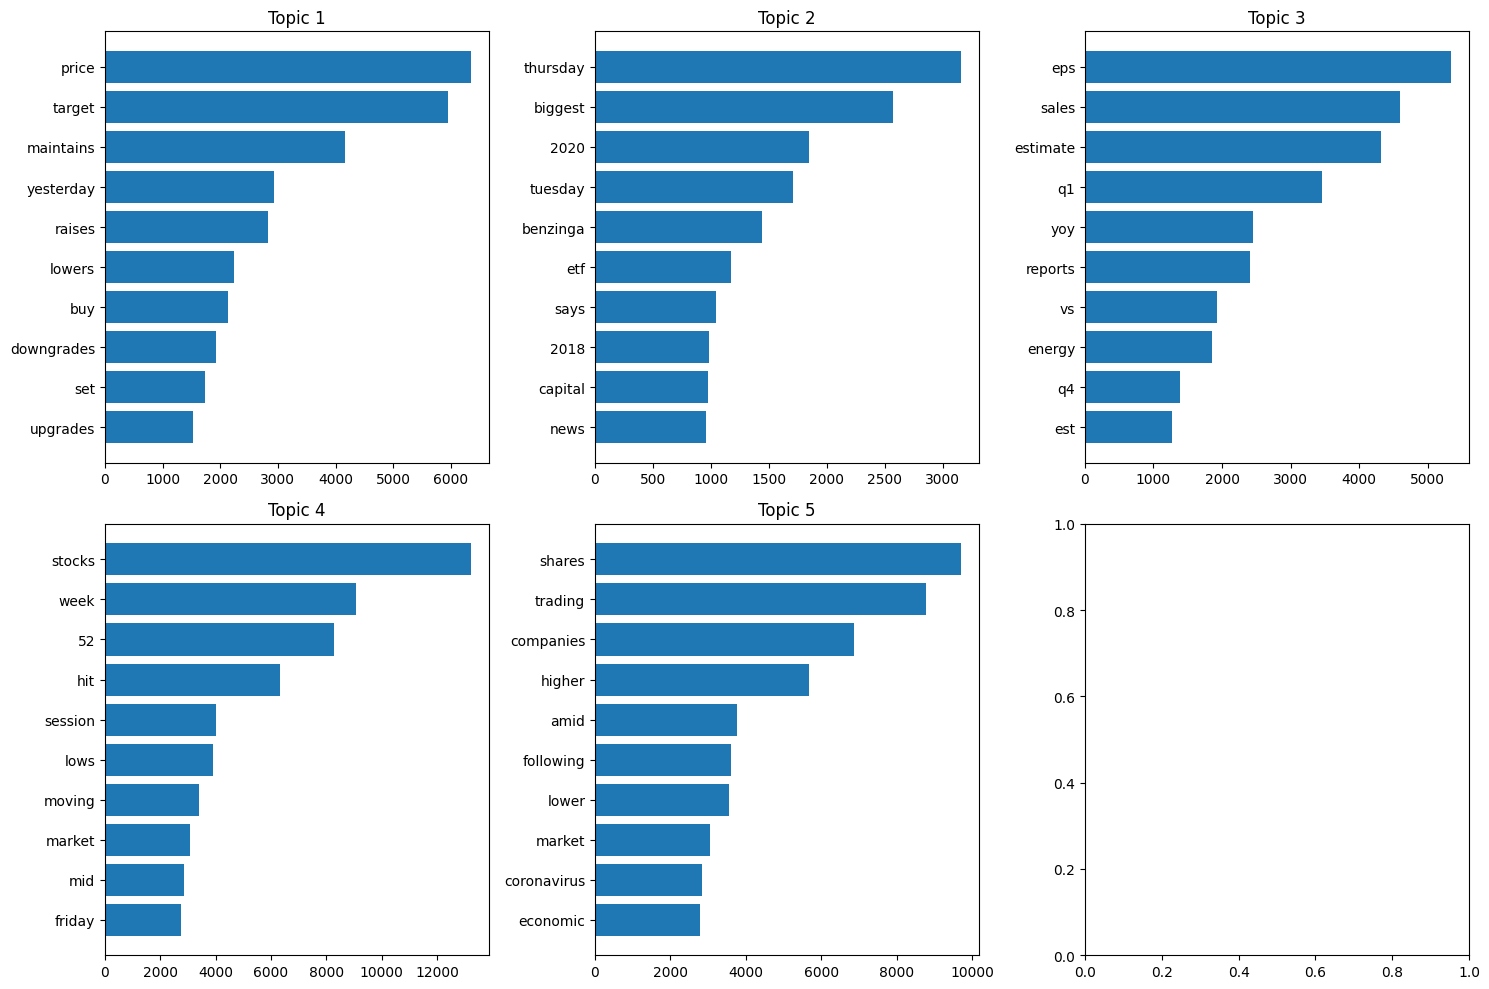

In [8]:
# Perform topic modeling
print("\n=== Topic Modeling ===")
analysis.extract_topics()


 ### 📊 Key Insights from Topic Modeling:
 1. 📈 Topic 1 - Market Performance:
    - Focused on price movements and market activity
    - Key terms: price, target, market, stock, shares
    - Suggests heavy coverage of stock price changes

 2. 💼 Topic 2 - Corporate Actions:
    - Captures major company events and updates
    - Terms like: report, earnings, quarter, guidance
    - Indicates focus on financial reporting cycles

 3. 🔄 Topic 3 - Industry Analysis:
    - Broader market and sector coverage
    - Features: market, sector, industry, analysis
    - Shows importance of contextual industry coverage

 4. 📱 Topic 4 - Company News:
    - Company-specific developments
    - Terms: company, business, growth, revenue
    - Reflects focus on individual company narratives

 5. 💰 Topic 5 - Financial Metrics:
    - Financial performance indicators
    - Includes: revenue, profit, growth, sales
    - Demonstrates emphasis on quantitative metrics

 🔍 Overall Observations:
 - Topics show clear separation between market, company, and industry news
 - Strong focus on quantitative metrics and performance
 - Balance between immediate market moves and longer-term analysis



=== Key Phrase Analysis ===

Analyzing Key Financial Phrases...

Common Financial Phrases Frequency:
IPO: 0.0 occurrences (0.0%)
FDA approval: 0.0 occurrences (0.0%)
analyst rating: 0.0 occurrences (0.0%)
stock split: 47.0 occurrences (0.1%)
guidance: 340.0 occurrences (0.6%)
acquisition: 535.0 occurrences (1.0%)
merger: 597.0 occurrences (1.1%)
dividend: 985.0 occurrences (1.8%)
upgrade: 1495.0 occurrences (2.7%)
downgrade: 2173.0 occurrences (3.9%)
earnings: 2277.0 occurrences (4.1%)
price target: 4586.0 occurrences (8.2%)


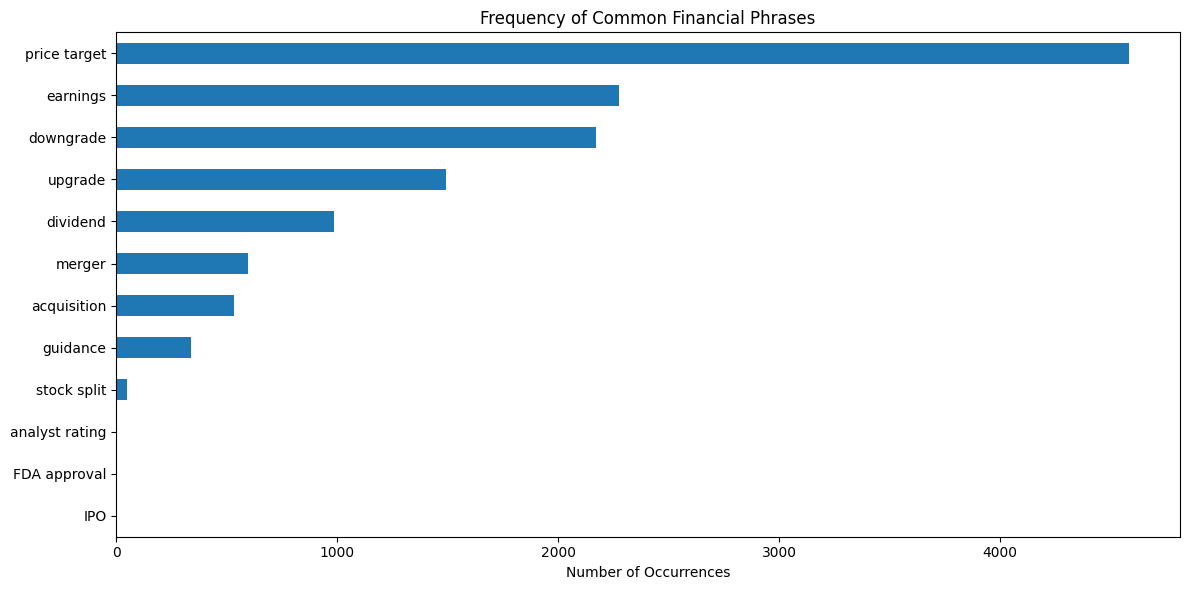

In [9]:
# Analyze key financial phrases
print("\n=== Key Phrase Analysis ===")
analysis.analyze_key_phrases()

 ### 📊 Key Insights from Financial Phrase Analysis:
 
 1. 🎯 Price Target Dominance:
    - Most frequent phrase by far (~4000 occurrences)
    - Indicates heavy focus on analyst price predictions
    - Suggests market's strong reliance on expert valuations

 2. 📈 Earnings & Guidance:
    - Second most common theme (~2500 occurrences)
    - Shows importance of financial performance reporting
    - Regular coverage of company forecasts and results

 3. 📊 Rating Changes:
    - Significant presence of upgrades/downgrades
    - Reflects active analyst coverage and opinion shifts
    - Important driver of market sentiment

 4. 💼 Corporate Actions:
    - Lower frequency of mergers, acquisitions, IPOs
    - These are major but less frequent events
    - Still crucial for market dynamics

 5. 📋 Other Observations:
    - Stock splits and FDA approvals least common
    - Dividend news relatively infrequent
    - Suggests focus on growth over income stories

 🔍 Overall Implications:
 - News coverage heavily weighted toward forward-looking analysis
 - Strong emphasis on expert opinions and forecasts
 - Regular financial reporting cycles drive significant coverage
 - Major corporate events get attention but are less frequent
